<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_12_Music_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN
### **[순환신경망](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)**

<img src ='https://tykimos.github.io/warehouse/2017-4-9-RNN_Layer_Talk_2.png'>

In [ ]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [ ]:
"/ ".join([str(code2idx[code]) for code in seq if code in code2idx])

'11/ 9/ 2/ 10/ 8/ 1/ 7/ 8/ 9/ 10/ 11/ 11/ 4/ 11/ 9/ 9/ 9/ 10/ 8/ 1/ 7/ 9/ 11/ 11/ 9/ 9/ 2/ 8/ 8/ 8/ 8/ 8/ 9/ 3/ 9/ 9/ 9/ 9/ 9/ 10/ 4/ 11/ 9/ 2/ 10/ 8/ 1/ 7/ 9/ 11/ 11/ 9/ 9/ 2'

In [ ]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [ ]:
dataset = seq2dataset(seq, window_size = 4)
dataset

array([[11,  9,  2, 10,  8],
       [ 9,  2, 10,  8,  1],
       [ 2, 10,  8,  1,  7],
       [10,  8,  1,  7,  8],
       [ 8,  1,  7,  8,  9],
       [ 1,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 11],
       [ 9, 10, 11, 11,  4],
       [10, 11, 11,  4, 11],
       [11, 11,  4, 11,  9],
       [11,  4, 11,  9,  9],
       [ 4, 11,  9,  9,  9],
       [11,  9,  9,  9, 10],
       [ 9,  9,  9, 10,  8],
       [ 9,  9, 10,  8,  1],
       [ 9, 10,  8,  1,  7],
       [10,  8,  1,  7,  9],
       [ 8,  1,  7,  9, 11],
       [ 1,  7,  9, 11, 11],
       [ 7,  9, 11, 11,  9],
       [ 9, 11, 11,  9,  9],
       [11, 11,  9,  9,  2],
       [11,  9,  9,  2,  8],
       [ 9,  9,  2,  8,  8],
       [ 9,  2,  8,  8,  8],
       [ 2,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  9],
       [ 8,  8,  8,  9,  3],
       [ 8,  8,  9,  3,  9],
       [ 8,  9,  3,  9,  9],
       [ 9,  3,  9,  9,  9],
       [ 3,  9,  9,  9,  9],
       [ 9,  9

In [ ]:
dataset.shape

(50, 5)

In [ ]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]
x_train

array([[11,  9,  2, 10],
       [ 9,  2, 10,  8],
       [ 2, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  8],
       [ 1,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 11],
       [10, 11, 11,  4],
       [11, 11,  4, 11],
       [11,  4, 11,  9],
       [ 4, 11,  9,  9],
       [11,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  8],
       [ 9, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  9],
       [ 1,  7,  9, 11],
       [ 7,  9, 11, 11],
       [ 9, 11, 11,  9],
       [11, 11,  9,  9],
       [11,  9,  9,  2],
       [ 9,  9,  2,  8],
       [ 9,  2,  8,  8],
       [ 2,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  9],
       [ 8,  8,  9,  3],
       [ 8,  9,  3,  9],
       [ 9,  3,  9,  9],
       [ 3,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  4],
       [ 9, 10,  4, 11],
       [10,  4, 11,  9],


In [ ]:
y_train

array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
        9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
        9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2])

In [ ]:
max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)
x_train

array([[0.84615385, 0.69230769, 0.15384615, 0.76923077],
       [0.69230769, 0.15384615, 0.76923077, 0.61538462],
       [0.15384615, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462, 0.07692308, 0.53846154],
       [0.61538462, 0.07692308, 0.53846154, 0.61538462],
       [0.07692308, 0.53846154, 0.61538462, 0.69230769],
       [0.53846154, 0.61538462, 0.69230769, 0.76923077],
       [0.61538462, 0.69230769, 0.76923077, 0.84615385],
       [0.69230769, 0.76923077, 0.84615385, 0.84615385],
       [0.76923077, 0.84615385, 0.84615385, 0.30769231],
       [0.84615385, 0.84615385, 0.30769231, 0.84615385],
       [0.84615385, 0.30769231, 0.84615385, 0.69230769],
       [0.30769231, 0.84615385, 0.69230769, 0.69230769],
       [0.84615385, 0.69230769, 0.69230769, 0.69230769],
       [0.69230769, 0.69230769, 0.69230769, 0.76923077],
       [0.69230769, 0.69230769, 0.76923077, 0.61538462],
       [0.69230769, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462,

In [ ]:
from tensorflow.keras.utils import to_categorical

# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [ ]:
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(units=one_hot_vec_size, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,700 (73.05 KB)

 Trainable params: 18,700 (73.05 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## 입력변수 (window size=4)  노드 128, 노드 바이어스 128개
4*128 +128

640

In [ ]:
import pandas as pd

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)
pd.DataFrame(hist.history)

,accuracy,loss
0,0.54,1.442960
1,0.52,1.416188
2,0.54,1.407299
3,0.52,1.388490
4,0.54,1.388780
...,...,...
95,0.56,1.217927
96,0.56,1.215193
97,0.56,1.210362
98,0.54,1.212437


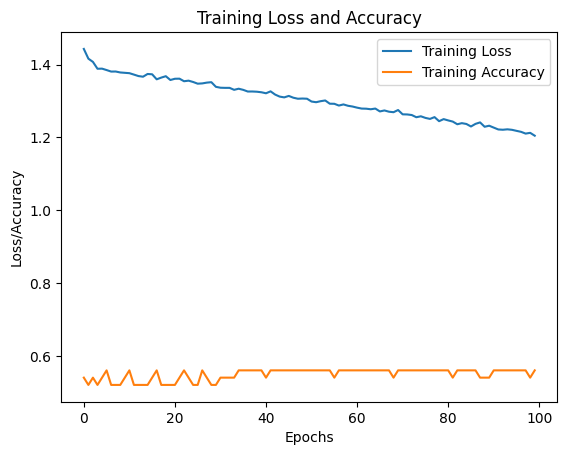

In [ ]:
import matplotlib.pyplot as plt

# 6. 학습과정 살펴보기
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Training Loss and Accuracy')
plt.show()


In [ ]:

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5400 - loss: 1.2277  
compile_metrics: 56.00%


In [ ]:

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e8', 'g8', 'e8', 'd4', 'e8', 'e8', 'e8', 'e8', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e8', 'd8', 'd8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g8', 'e8', 'd4', 'c8', 'd8', 'd4', 'c8', 'd8', 'g8', 'g8', 'e8', 'e8', 'e8']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━

## SimpleRNN

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 1. 입력 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. Label Encoding: 각 음표를 정수로 변환
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(seq)
integer_encoded

array([8, 4, 3, 6, 2, 1, 0, 2, 4, 6, 8, 8, 7, 8, 4, 4, 4, 6, 2, 1, 0, 4,
       8, 8, 4, 4, 3, 2, 2, 2, 2, 2, 4, 5, 4, 4, 4, 4, 4, 6, 7, 8, 4, 3,
       6, 2, 1, 0, 4, 8, 8, 4, 4, 3])

In [ ]:
set(seq)

{'c8', 'd4', 'd8', 'e4', 'e8', 'f4', 'f8', 'g4', 'g8'}

In [ ]:
# 3. One-Hot Encoding: 정수형 데이터를 원-핫 벡터로 변환
one_hot_encoded = to_categorical(integer_encoded)
one_hot_encoded

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0.

In [ ]:

# 4. RNN 입력 형식으로 변환: 시퀀스 길이 및 입력 형식 맞추기
sequence_length = 5  # 시퀀스 길이 설정
X, y = [], []

# 슬라이딩 윈도우 방식으로 시퀀스 생성
for i in range(len(one_hot_encoded) - sequence_length):
    X.append(one_hot_encoded[i:i + sequence_length])
    y.append(one_hot_encoded[i + sequence_length])

# numpy 배열로 변환
X = np.array(X)
y = np.array(y)

X

array([[[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]],

  

In [ ]:
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0.

In [ ]:
print(X.shape)
print(y.shape)

(49, 5, 9)
(49, 9)


In [ ]:

# 5. RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(128, input_shape=(sequence_length, one_hot_encoded.shape[1]), activation='relu'))
model.add(Dense(one_hot_encoded.shape[1], activation='softmax'))

# 6. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. 모델 요약 출력
model.summary()

# 8. 모델 학습
model.fit(X, y, epochs=100, batch_size=32)

# 9. 테스트용 예측
sample_input = X[0].reshape(1, sequence_length, one_hot_encoded.shape[1])
prediction = model.predict(sample_input)

# 10. 예측 결과를 다시 음표로 변환
predicted_index = np.argmax(prediction)
predicted_note = label_encoder.inverse_transform([predicted_index])
print("Predicted next note:", predicted_note[0])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,825 (73.54 KB)

 Trainable params: 18,825 (73.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1265 - loss: 2.1480
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3563 - loss: 2.0792 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4043 - loss: 2.0204 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4420 - loss: 1.9611
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3971 - loss: 1.9004 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3835 - loss: 1.8512 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3699 - loss: 1.7703 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3563 - loss: 1.6927
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3146 - loss: 1.6897 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3250 - loss: 1.6534 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3459 - loss: 1.5473
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3563 - l